In [82]:
import warnings
warnings.filterwarnings('ignore')

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
#import lightgbm
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Import our input dataset
file_path = "Resources/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Preprocessing

Done in Preprocessing_Logistic Regression_+_Basic_Neural_Network.ipynb by XDarkPhoenixes

In [83]:
Telco_df = df.copy()
Telco_df.set_index('customerID', inplace=True)
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
# Generate our categorical variable list
Telco_cat = Telco_df.dtypes[Telco_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
Telco_df[Telco_cat].nunique()

gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [85]:
Telco_df['TotalCharges'] = pd.to_numeric(Telco_df['TotalCharges'], errors='coerce')

Telco_df.dropna(inplace = True)

# List categorical features 
Telco_cat = Telco_df.dtypes[Telco_df.dtypes == "object"].index.tolist()

In [86]:
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
import plotly.express as px

fig = px.scatter(x=Telco_df['tenure'], y=Telco_df['TotalCharges'], 
                 color = Telco_df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = Telco_df['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

# Pycaret 

Done in PycaretTEST2.ipynb by githubteodora

In [88]:
# create_model("rf")

from pycaret.classification import *
s = setup(Telco_df, target = 'Churn')

,Description,Value
0,session_id,245
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7032, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [89]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8054,0.8404,0.5235,0.6674,0.5858,0.4613,0.4676,0.7130
lr,Logistic Regression,0.8054,0.8394,0.5389,0.6615,0.5925,0.4667,0.4718,1.4420
ada,Ada Boost Classifier,0.7966,0.8370,0.5235,0.6407,0.5755,0.4437,0.4480,0.3180
lda,Linear Discriminant Analysis,0.8019,0.8343,0.5543,0.6454,0.5952,0.4653,0.4684,0.0790
nb,Naive Bayes,0.7403,0.8275,0.7637,0.5061,0.6082,0.4260,0.4467,0.0420
lightgbm,Light Gradient Boosting Machine,0.7972,0.8260,0.5258,0.6417,0.5774,0.4459,0.4501,0.1940
rf,Random Forest Classifier,0.7948,0.8156,0.4842,0.6483,0.5537,0.4244,0.4323,0.7840
et,Extra Trees Classifier,0.7767,0.7874,0.4773,0.5972,0.5298,0.3859,0.3905,0.8840
knn,K Neighbors Classifier,0.7668,0.7350,0.4357,0.5770,0.4961,0.3483,0.3543,0.1140
dt,Decision Tree Classifier,0.7282,0.6535,0.4889,0.4848,0.4861,0.3015,0.3020,0.0720


In [90]:
# print best_model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=245, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [91]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8073,0.8751,0.4538,0.7108,0.5540,0.4386,0.4566
1,0.7911,0.8416,0.3615,0.7015,0.4772,0.3629,0.3940
2,0.7947,0.8414,0.4341,0.6667,0.5258,0.4022,0.4173
3,0.8089,0.8586,0.4462,0.7250,0.5524,0.4396,0.4605
4,0.7907,0.8458,0.4154,0.6667,0.5118,0.3876,0.4052
5,0.7967,0.8374,0.4308,0.6829,0.5283,0.4071,0.4247
6,0.8089,0.8615,0.4462,0.7250,0.5524,0.4396,0.4605
7,0.8028,0.8322,0.3692,0.7619,0.4974,0.3926,0.4325
8,0.7927,0.8192,0.4000,0.6842,0.5049,0.3849,0.4071
9,0.7642,0.8186,0.3615,0.5875,0.4476,0.3084,0.3231


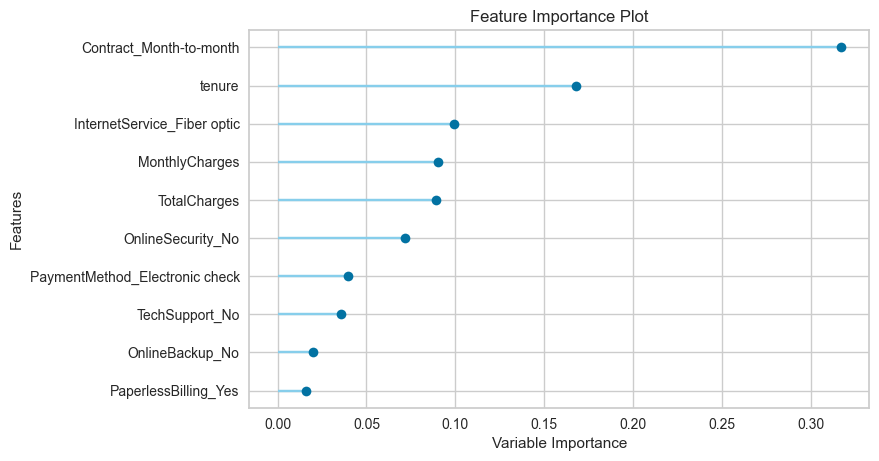

In [92]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

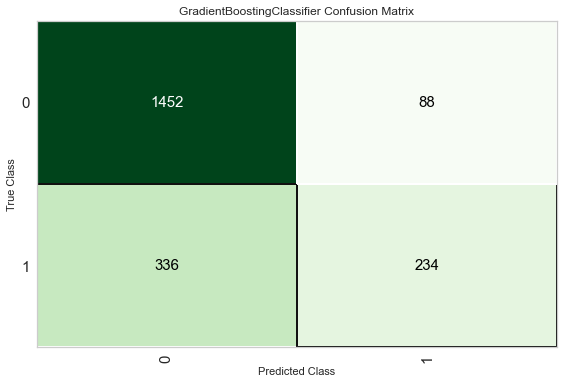

In [93]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

## Custom Function

In [94]:
# create a custom function
# Example using 1000 and 3000
def calculate_profit(y, y_pred):
    true_positive = np.where((y_pred==1) & (y==1), (3000-1000), 0)
    false_positive = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([true_positive,false_positive])
# add metric to PyCaret
add_metric('profit3', 'Profit3', calculate_profit)

Name                                                    Profit3
Display Name                                            Profit3
Score Function       <function calculate_profit at 0x159b545f0>
Scorer                            make_scorer(calculate_profit)
Target                                                     pred
Args                                                         {}
Greater is Better                                          True
Multiclass                                                 True
Custom                                                     True
Name: profit3, dtype: object

In [95]:
# Now let’s run compare_models and see the magic.
best_model = compare_models(sort='Profit3')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit3,TT (Sec)
lda,Linear Discriminant Analysis,0.8019,0.8343,0.5543,0.6454,0.5952,0.4653,0.4684,104400.0000,0.1450
lr,Logistic Regression,0.8054,0.8394,0.5389,0.6615,0.5925,0.4667,0.4718,104100.0000,0.3320
gbc,Gradient Boosting Classifier,0.8054,0.8404,0.5235,0.6674,0.5858,0.4613,0.4676,102100.0000,0.7660
ridge,Ridge Classifier,0.8054,0.0000,0.5181,0.6692,0.5830,0.4591,0.4660,101400.0000,0.0650
nb,Naive Bayes,0.7403,0.8275,0.7637,0.5061,0.6082,0.4260,0.4467,101300.0000,0.0820
lightgbm,Light Gradient Boosting Machine,0.7972,0.8260,0.5258,0.6417,0.5774,0.4459,0.4501,98400.0000,0.2600
ada,Ada Boost Classifier,0.7966,0.8370,0.5235,0.6407,0.5755,0.4437,0.4480,97800.0000,0.3810
rf,Random Forest Classifier,0.7948,0.8156,0.4842,0.6483,0.5537,0.4244,0.4323,91800.0000,0.9060
et,Extra Trees Classifier,0.7767,0.7874,0.4773,0.5972,0.5298,0.3859,0.3905,82000.0000,0.9170
knn,K Neighbors Classifier,0.7668,0.7350,0.4357,0.5770,0.4961,0.3483,0.3543,71700.0000,0.2000


### Data was not encoded or scaled yet!

# Encoding, scaling and splitting the data 

Done in Preprocessing_Logistic Regression_+_Basic_Neural_Network.ipynb by XDarkPhoenixes

In [96]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Telco_df[Telco_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(Telco_cat)
encode_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [97]:
# Merge one-hot encoded features and drop the originals
Telco_df.reset_index(drop=True, inplace=True)
Telco_df = Telco_df.merge(encode_df, left_index=True, right_index=True)
Telco_df = Telco_df.drop(Telco_cat, 1)
Telco_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [98]:
# Split our preprocessed data into out features and target arrays
y = Telco_df["Churn_Yes"].values
X = Telco_df.drop(['Churn_Yes','Churn_No'],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [99]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# RandomForestClassifier

Done in Telco_churn_RandomForestClassifier.ipynb by gabrielatuma

In [100]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.779


In [101]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1144,  137],
       [ 252,  225]])

In [102]:
# Print the imbalanced classification report - BalancedRandomForestClassifier
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.82      0.89      0.47      0.85      0.65      0.44      1281
        1.0       0.62      0.47      0.89      0.54      0.65      0.40       477

avg / total       0.77      0.78      0.59      0.77      0.65      0.43      1758



In [103]:
importance = rf_model.feature_importances_
importance

array([0.01984813, 0.1427559 , 0.13754376, 0.16006931, 0.01758996,
       0.01751982, 0.01355071, 0.01374824, 0.01126677, 0.01218428,
       0.002949  , 0.00289406, 0.0135656 , 0.00285992, 0.01295904,
       0.01211707, 0.02465668, 0.00272084, 0.03392431, 0.00168991,
       0.0119578 , 0.01746398, 0.00184767, 0.01182181, 0.01467148,
       0.00196619, 0.01171122, 0.03071882, 0.00258584, 0.01059953,
       0.01109732, 0.00273509, 0.01150671, 0.01165538, 0.0036721 ,
       0.01178922, 0.0482938 , 0.01131937, 0.01786731, 0.01590874,
       0.01566074, 0.01183675, 0.01194175, 0.03177105, 0.011187  ])

In [104]:
# List features with more impact 

important_features = pd.Series(data=rf_model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.head(15)

TotalCharges                      0.160069
tenure                            0.142756
MonthlyCharges                    0.137544
Contract_Month-to-month           0.048294
OnlineSecurity_No                 0.033924
PaymentMethod_Electronic check    0.031771
TechSupport_No                    0.030719
InternetService_Fiber optic       0.024657
SeniorCitizen                     0.019848
Contract_Two year                 0.017867
gender_Female                     0.017590
gender_Male                       0.017520
OnlineBackup_No                   0.017464
PaperlessBilling_No               0.015909
PaperlessBilling_Yes              0.015661
dtype: float64

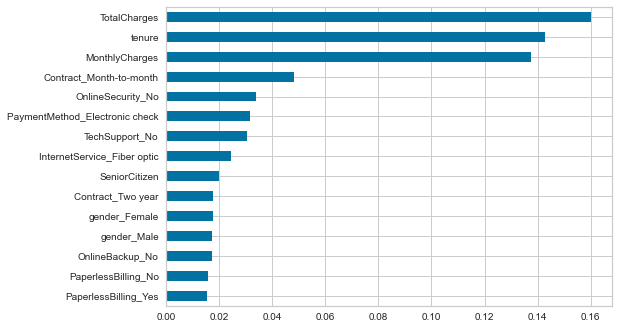

In [105]:
import matplotlib.pyplot as plt

plt.figure();
importance_df = important_features.head(15)
importance_df.sort_values(ascending=True,inplace=True)
importance_df.plot.barh();

# Logistic Regression

Done in Preprocessing_Logistic Regression_+_Basic_Neural_Network.ipynb by XDarkPhoenixes

In [106]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.793


In [107]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1141,140
Actual 1,224,253


In [108]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1281
         1.0       0.64      0.53      0.58       477

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



# Deep Learning Model

Done in Preprocessing_Logistic Regression_+_Basic_Neural_Network.ipynb by XDarkPhoenixes

and Telco_churn_Deep_Learning.ipynb by gabrielatuma

In [109]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=45))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
165/165 [==============================] - 2s 4ms/step - loss: 0.6309 - accuracy: 0.7224
Epoch 2/50
165/165 [==============================] - 1s 4ms/step - loss: 0.5125 - accuracy: 0.7361
Epoch 3/50
165/165 [==============================] - 1s 5ms/step - loss: 0.4777 - accuracy: 0.7361
Epoch 4/50
165/165 [==============================] - 1s 7ms/step - loss: 0.4655 - accuracy: 0.7361
Epoch 5/50
165/165 [==============================] - 1s 4ms/step - loss: 0.4605 - accuracy: 0.7361
Epoch 6/50
165/165 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.7361
Epoch 7/50
165/165 [==============================] - 1s 4ms/step - loss: 0.4549 - accuracy: 0.7361
Epoch 8/50
165/165 [==============================] - 1s 5ms/step - loss: 0.4534 - accuracy: 0.7361
Epoch 9/50
165/165 [==============================] - 1s 8ms/step - loss: 0.4502 - accuracy: 0.7361
Epoch 10/50
165/165 [==============================] - 1s 6ms/step - loss: 0.4472 - accuracy: 0.7361

In [110]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.4520 - accuracy: 0.7890
Loss: 0.45202872157096863, Accuracy: 0.7889647483825684


In [111]:
# Adding some settings to the basic neural model - attempt to improve accuracy

# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=45, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                2300      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 3,541
Trainable params: 3,541
Non-trainable params: 0
_________________________________________________________________


In [112]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
165/165 [==============================] - 2s 4ms/step - loss: 0.5271 - accuracy: 0.7290
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.7746
Epoch 3/50
165/165 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.7876
Epoch 4/50
165/165 [==============================] - 1s 5ms/step - loss: 0.4342 - accuracy: 0.7918: 0s - loss: 0.4345 - accuracy: 0.
Epoch 5/50
165/165 [==============================] - 1s 7ms/step - loss: 0.4276 - accuracy: 0.7958
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7986: 0s - loss: 0.4199 - accuracy
Epoch 7/50
165/165 [==============================] - 1s 5ms/step - loss: 0.4180 - accuracy: 0.8003
Epoch 8/50
165/165 [==============================] - 1s 8ms/step - loss: 0.4145 - accuracy: 0.8036
Epoch 9/50
165/165 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8058
Epoch 10/50
165/165 [===============

In [113]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.4723 - accuracy: 0.7702
Loss: 0.47231659293174744, Accuracy: 0.7701933979988098


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warning

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warning

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warning